Call or put? Enter in lowercase letters: call
Enter the expiration date (YYYY-MM-DD): 2023-11-17
Enter the stock ticker: CVAC
Enter the strike price: 5
Enter the option premium: .65


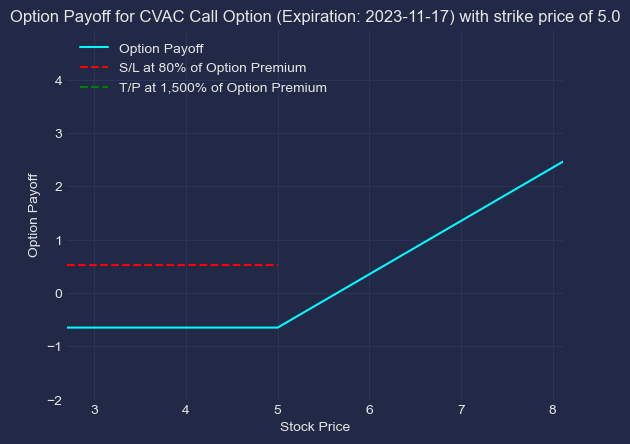

In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-2, max(option_payoffs) * 2])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=8 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=3 * option_premium, color='green', linestyle='--', label='T/P at 300% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


Enter the expiration date (YYYY-MM-DD): 2023-11-17
Enter the stock ticker: CVAC
Enter the strike price: 5
Enter the option premium: .65


<IPython.core.display.Javascript object>


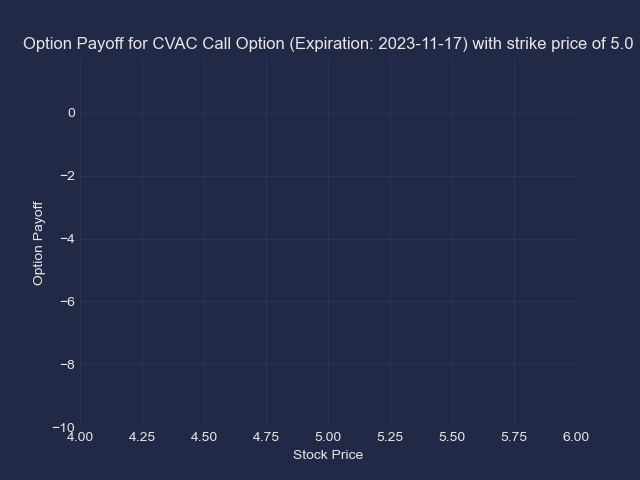

MovieWriter imagemagick unavailable; using Pillow instead.


In [7]:
#Working call backup zero
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mplcyberpunk

%matplotlib nbagg



# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
def option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Apply the option payoff function to the stock price range
option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.8), int(current_price*1.2)])
ax.set_ylim([-2, max(df['Option Payoff'])*2])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date}) with strike price of {strike_price}')

# Create the line object
line, = ax.plot([], [])

chart_filename = f'{stock_ticker}_Option_Payoff.gif'

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=25, blit=True)

ani.save(chart_filename, writer='imagemagick')

# Show the plot
plt.style.use('cyberpunk')
plt.show()


In [ ]:
#Call or Put preference
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


In [ ]:
#Consider both calls and puts
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mplcyberpunk
%matplotlib nbagg

# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
call_premium = float(input('Enter the call premium: '))
put_premium = float(input('Enter the put premium: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
def option_payoff(stock_price, strike_price, call_premium, put_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - put_premium, -call_premium)
    else:
        return stock_price - strike_price - call_premium

# Apply the option payoff function to the stock price range
option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, call_premium, put_premium))

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.5), int(current_price*1.5)])
ax.set_ylim([-10, max(df['Option Payoff'])*1.1])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call and Put Options (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

chart_filename = f'{stock_ticker}_Option_Payoff.gif'

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)

ani.save("resultsGGGTTT.png")

# Show the plot
plt.style.use('cyberpunk')
plt.show()

In [ ]:
#Put payoff
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplcyberpunk
from matplotlib.animation import FuncAnimation

call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

stock_prices = pd.Series(range(0, int(current_price * 1.5)))  # Start X-axis from zero

def option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

if call_or_put == "call":
    option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))
    df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

elif call_or_put == "put":
    option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))
    df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

fig, ax = plt.subplots()
line, = ax.plot([], [], label='Option Payoff', linestyle='-')

ax.set_xlabel('Stock Price')
ax.set_xlim(0, int(current_price * 1.2))  # Set X-axis limits to start from zero

max_payoff = max(df['Option Payoff']) * 1.1
min_payoff = min(df['Option Payoff']) * 1.1
ax.set_ylim([min(min_payoff, -option_premium), max(max_payoff, -option_premium)])

ax.set_ylabel('Option Payoff')
ax.set_title(f'Option Payoff for {stock_ticker} {"Call" if call_or_put == "call" else "Put"} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

ax.legend()
plt.style.use('cyberpunk')

chart_filename = f'{stock_ticker}_Option_Payoff.gif'

# Animation function
def update(frame):
    line.set_data(df['Stock Price'][:frame], df['Option Payoff'][:frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(df), blit=True)

ani.save(chart_filename, writer='imagemagick')
plt.show()

print(f'Chart saved as {chart_filename}')


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-10, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


Call or put? Enter in lowercase letters: call
Enter the expiration date (YYYY-MM-DD): 2023-11-17
Enter the stock ticker: CVAC
Enter the strike price: 5
Enter the option premium: .65


<IPython.core.display.Javascript object>


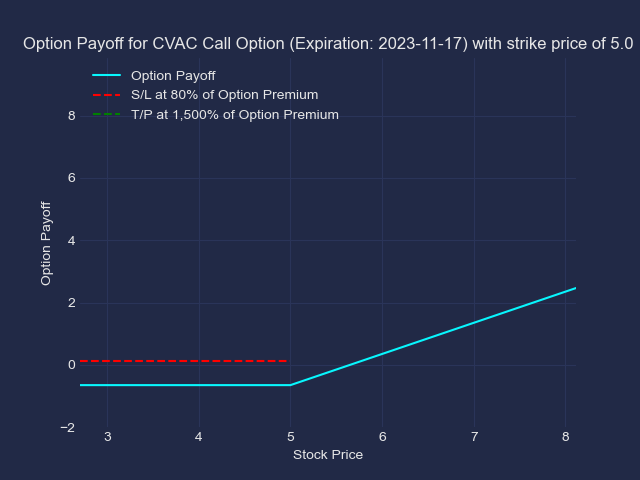

In [12]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-2, max(option_payoffs) * 4])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 5 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.2 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=5 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


Call or put? Enter in lowercase letters: call
Enter the expiration date (YYYY-MM-DD): 2023-11-17
Enter the stock ticker: CVAC
Enter the strike price: 5
Enter the option premium: .65


<IPython.core.display.Javascript object>


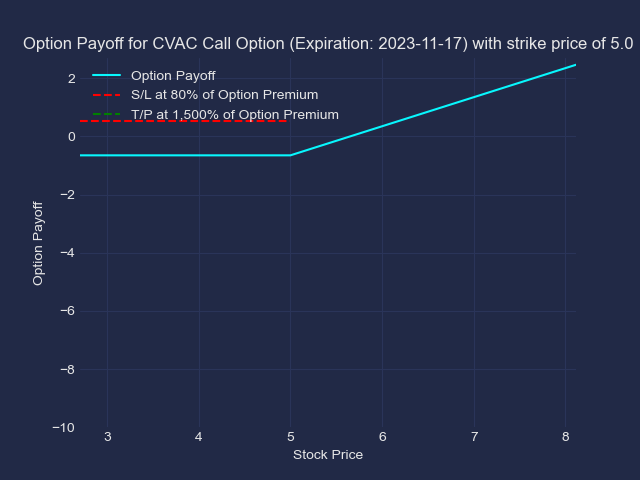

In [8]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

# Function to calculate the call option payoff
def call_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Function to calculate the put option payoff
def put_option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return max(strike_price - stock_price - option_premium, -option_premium)
    else:
        return -option_premium

# Function to plot the option payoff diagram
def plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium):
    # Get the last closing price of the stock from Yahoo Finance
    stock_info = yf.Ticker(stock_ticker).history(period='1d')
    current_price = stock_info['Close'][0]

    # Create a range of stock prices
    stock_prices = np.linspace(current_price * 0.5, current_price * 1.5, 100)

    # Calculate option payoffs based on call or put
    if call_or_put == "call":
        option_payoffs = [call_option_payoff(price, strike_price, option_premium) for price in stock_prices]
    elif call_or_put == "put":
        option_payoffs = [put_option_payoff(price, strike_price, option_premium) for price in stock_prices]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Set the axis limits
    ax.set_xlim([current_price * 0.5, current_price * 1.5])
    ax.set_ylim([-2, max(option_payoffs) * 1.1])

    # Set the axis labels
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Option Payoff')

    # Set the title
    ax.set_title(f'Option Payoff for {stock_ticker} {call_or_put.capitalize()} Option (Expiration: {expiration_date}) with strike price of {strike_price}')

    # Plot the option payoff function
    ax.plot(stock_prices, option_payoffs, label='Option Payoff')

    # Find the index where the option payoff is equal to the green line y value
    start_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

    # Add horizontal red line at 80% of the option_premium value to the left of the option payoff
    if call_or_put == "call":
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=0, xmax=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5))
    else:
        # Flip the horizontal red line for a put option
        ax.axhline(y=0.8 * option_premium, color='red', linestyle='--', label='S/L at 80% of Option Premium', xmin=(strike_price - current_price * 0.5) / (current_price * 1.5 - current_price * 0.5), xmax=1)

    # Add horizontal green line for a call option starting from the intersection point and ending at the maximum x-axis value
    if call_or_put == "call":
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=1)
    else:
        # Find the index where the option payoff becomes non-negative
        start_index = next(i for i, payoff in enumerate(option_payoffs) if payoff >= 0)

        # Find the index where the option payoff is equal to the green line y value
        end_index = np.argmin(np.abs(np.array(option_payoffs) - 15 * option_premium))

        # Add horizontal green line for a put option starting from the intersection point and ending at the non-negative region
        ax.axhline(y=15 * option_premium, color='green', linestyle='--', label='T/P at 1,500% of Option Premium', xmin=start_index / (len(stock_prices) - 1), xmax=end_index / (len(stock_prices) - 1))

    plt.style.use('cyberpunk')

    # Add legend to the plot
    ax.legend(loc='upper left')

    plt.show()

# Request user input for option parameters
call_or_put = input("Call or put? Enter in lowercase letters: ")
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Plot the option payoff diagram based on user input
plot_option_payoff(call_or_put, expiration_date, stock_ticker, strike_price, option_premium)


In [ ]:
#Working Call Payoff Script
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import mplcyberpunk
#%matplotlib nbagg



# Request user input for option parameters
expiration_date = input('Enter the expiration date (YYYY-MM-DD): ')
stock_ticker = input('Enter the stock ticker: ')
strike_price = float(input('Enter the strike price: '))
option_premium = float(input('Enter the option premium: '))

# Get the last closing price of the stock from Yahoo Finance
stock_info = yf.Ticker(stock_ticker).history(period='1d')
current_price = stock_info['Close'][0]

# Create a range of stock prices
stock_prices = pd.Series(range(int(current_price*0.5), int(current_price*1.5)))

# Define the option payoff function
def option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Apply the option payoff function to the stock price range
option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([int(current_price*0.5), int(current_price*1.5)])
ax.set_ylim([-10, max(df['Option Payoff'])*1.1])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date}) with strike price of {strike_price}')


# Create the line object
line, = ax.plot([], [])


chart_filename = f'{stock_ticker}_Option_Payoff.gif'


# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=25, blit=True)

ani.save(chart_filename, writer='imagemagick')

# Show the plot
plt.style.use('cyberpunk')
plt.show()